In [114]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [96]:
df= pd.read_csv("/Users/mugzi/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [51]:
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


Analytics on engagement rates by offer type , vehicle class , engagement by sales channel 
Analytics on egagement rates

In [7]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [11]:
#Engagment rate 
response_counts =df.groupby("Response").count()["Customer"]

Text(0.5, 1.0, 'Customer Response Counts')

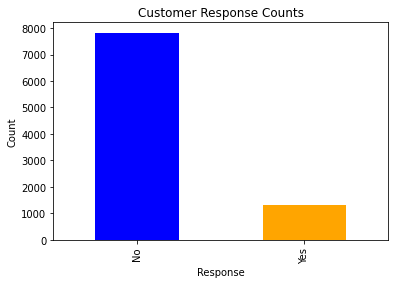

In [15]:
response_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel("Response")
plt.ylabel("Count")
plt.title("Customer Response Counts")

In [16]:
#Getting the response rate 
relative_frequencies = df.groupby('Response').count()['Customer'] / df.shape[0]

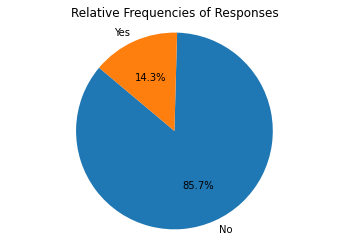

In [18]:
#Show response rates
plt.pie(relative_frequencies, labels=relative_frequencies.index, autopct='%1.1f%%', startangle=140)
plt.title("Relative Frequencies of Responses")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The pie chart provides a visual representation of the data, revealing that approximately 14% of the clients actively participated in the marketing campaign. It's crucial to delve deeper into understanding the factors that contributed to the success of this group and identify the strategies that yielded positive outcomes for them.

In [21]:
total_counts_by_offer_type = df.groupby('Renew Offer Type').count()['Customer']

In [22]:
total_counts_by_offer_type

Renew Offer Type
Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Customer, dtype: int64

In [24]:
response_counts_by_offer_type = df.pivot_table(index='Renew Offer Type', columns='Response', values='Customer', aggfunc='count', fill_value=0)

In [30]:
proportions_by_offer_type = response_counts_by_offer_type.div(total_counts_by_offer_type, axis=0)

In [31]:
proportions_by_offer_type

Response,No,Yes
Renew Offer Type,,
Offer1,0.841684,0.158316
Offer2,0.766234,0.233766
Offer3,0.979050,0.020950
Offer4,1.000000,0.000000


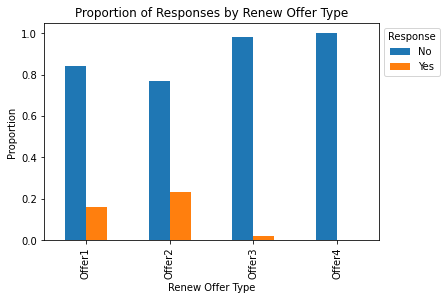

In [49]:
proportions_by_offer_type.plot(kind='bar', stacked=False)
plt.xlabel('Renew Offer Type')
plt.ylabel('Proportion')
plt.title('Proportion of Responses by Renew Offer Type')
plt.legend(title='Response', bbox_to_anchor=(1, 1),loc='upper left', labels=['No', 'Yes'])

plt.show()

Looking at this data we can see we have high engagement rates for Offer 2 followed by Offer 1 and Offer 3

In [40]:
offer_type_df = df.loc[df['Response'] == 'Yes'] \
    .groupby(['Renew Offer Type', 'Vehicle Class']) \
    .count()['Customer'] / df.groupby('Renew Offer Type').count()['Customer']


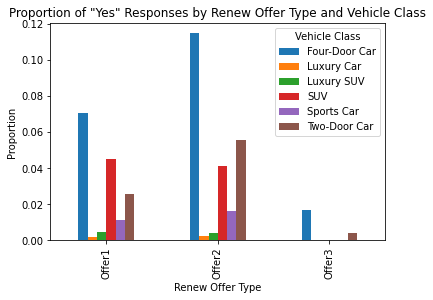

In [44]:
proportions_by_offer_and_class = offer_type_df.unstack()

# Plotting
proportions_by_offer_and_class.plot(kind='bar', stacked=False)
plt.xlabel('Renew Offer Type')
plt.ylabel('Proportion')
plt.title('Proportion of "Yes" Responses by Renew Offer Type and Vehicle Class')
plt.legend(title='Vehicle Class')

plt.show()

If we take a closer look, Four Door car owners take majorly offer 2 as compared to offer 1 and 3 for clients who own SUV. Two sports Door car owners take offer 2 as compared to offer 1. From a marketers POV for its best to use offer 2 across all the clients who drive Four-Door car to improve the conversion rates. The same applies for Two doo cars its best to use offer2.

In [46]:
sales_channel_df = df.loc[    df['Response'] == 'Yes'].groupby(['Sales Channel']).count()['Customer']/df.groupby('Sales Channel').count()['Customer']


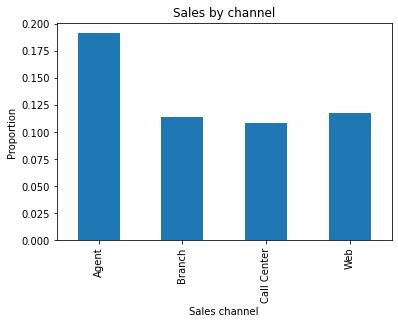

In [48]:
sales_channel_df.plot(kind='bar', stacked=False)
plt.xlabel('Sales channel')
plt.ylabel('Proportion')
plt.title('Sales by channel')
#plt.legend(title='Sales channels')

plt.show()

From the graph the Agent has the most number of sales followed by Web,Branch and then Call Center.

Predicting Likelihood of marketing engagement 

In [97]:
#Encode the repsonse variable
df['Engaged'] = df['Response'].map({'Yes': 1, 'No': 0})
df["Gender"]= df["Gender"].map({'F': 1, 'M': 0})


In [98]:
columns_to_encode = ["Location Code","State",'Sales Channel',"Renew Offer Type", 'Vehicle Size', 'Vehicle Class', 'Policy', 'Policy Type','EmploymentStatus', 'Marital Status', 'Education', 'Coverage']

df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

In [123]:
response = df["Engaged"]
cols_to_exclude = ['Response',"Engaged","Customer","Effective To Date"]
features =df.drop(columns=cols_to_exclude, axis=1)

In [124]:
features.columns

Index(['Customer Lifetime Value', 'Gender', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
       'Location Code_Suburban', 'Location Code_Urban', 'State_California',
       'State_Nevada', 'State_Oregon', 'State_Washington',
       'Sales Channel_Branch', 'Sales Channel_Call Center',
       'Sales Channel_Web', 'Renew Offer Type_Offer2',
       'Renew Offer Type_Offer3', 'Renew Offer Type_Offer4',
       'Vehicle Size_Medsize', 'Vehicle Size_Small',
       'Vehicle Class_Luxury Car', 'Vehicle Class_Luxury SUV',
       'Vehicle Class_SUV', 'Vehicle Class_Sports Car',
       'Vehicle Class_Two-Door Car', 'Policy_Corporate L2',
       'Policy_Corporate L3', 'Policy_Personal L1', 'Policy_Personal L2',
       'Policy_Personal L3', 'Policy_Special L1', 'Policy_Special L2',
       'Policy_Special L3', 'Policy Type_Personal Auto',
       'Policy Type_Special Au

In [125]:
x_train, x_test, y_train, y_test = train_test_split(features, response, test_size=0.3)



In [126]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=5)
rf_model.fit(X=x_train, y=y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [130]:
feature_names = features.columns
feature_importances=rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                           Feature  Importance
40        EmploymentStatus_Retired    0.238917
18         Renew Offer Type_Offer2    0.097686
19         Renew Offer Type_Offer3    0.087508
20         Renew Offer Type_Offer4    0.078703
2                           Income    0.069523
8               Total Claim Amount    0.046633
9           Location Code_Suburban    0.045105
0          Customer Lifetime Value    0.043444
5    Months Since Policy Inception    0.033067
3             Monthly Premium Auto    0.032480
41     EmploymentStatus_Unemployed    0.031383
4          Months Since Last Claim    0.023508
42          Marital Status_Married    0.018183
43           Marital Status_Single    0.017412
38       EmploymentStatus_Employed    0.016913
7               Number of Policies    0.013630
47                Education_Master    0.010124
6        Number of Open Complaints    0.010101
10             Location Code_Urban    0.010062
15            Sales Channel_Branch    0.008058
22           

In [131]:
y_train_predicted = rf_model.predict(x_train)
y_test_predicted = rf_model.predict(x_test)

In [143]:
y_test

2913    0
6439    0
8476    1
4150    0
5189    0
       ..
6664    0
1410    0
8147    0
3667    0
5854    0
Name: Engaged, Length: 2741, dtype: int64

In [139]:
all_indices = y_test.index

In [140]:
print(all_indices)

Int64Index([2913, 6439, 8476, 4150, 5189, 3310, 3397, 3156, 2634, 1671,
            ...
            5358, 5745, 4126, 8175,   39, 6664, 1410, 8147, 3667, 5854],
           dtype='int64', length=2741)


In [142]:
corresponding_values = response.loc[y_test.index]

print(corresponding_values)

2913    0
6439    0
8476    1
4150    0
5189    0
       ..
6664    0
1410    0
8147    0
3667    0
5854    0
Name: Engaged, Length: 2741, dtype: int64


In [144]:
comparison_df = pd.DataFrame({'y_test': y_test, 'corresponding_values': corresponding_values})

# Add a column indicating whether the values match
comparison_df['match'] = comparison_df['y_test'] == comparison_df['corresponding_values']

print(comparison_df)

      y_test  corresponding_values  match
2913       0                     0   True
6439       0                     0   True
8476       1                     1   True
4150       0                     0   True
5189       0                     0   True
...      ...                   ...    ...
6664       0                     0   True
1410       0                     0   True
8147       0                     0   True
3667       0                     0   True
5854       0                     0   True

[2741 rows x 3 columns]


In [149]:
comparison_df["corresponding_values"].value_counts()

0    2367
1     374
Name: corresponding_values, dtype: int64

So from this data approximately 374 people shall say yes to the Market Campaign. Therefore as marketeer you need to focus on these clients 